In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

# train test split
from sklearn.model_selection import train_test_split

# impute missing values
from sklearn.impute import SimpleImputer # mean, median, most_frequent (mode), constant
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer # regresi
from sklearn.impute import KNNImputer # regresi KKN

# encoding
from sklearn.preprocessing import OneHotEncoder
from category_encoders import OrdinalEncoder, BinaryEncoder

# scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler 

# column transformer & pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# cross validation
from sklearn.model_selection import cross_val_score, StratifiedKFold, cross_val_predict

# base algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# ensemble various
from sklearn.ensemble import VotingClassifier, StackingClassifier

# ensemble similar
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
# metric
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score , confusion_matrix, ConfusionMatrixDisplay, fbeta_score, make_scorer, roc_auc_score

# hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint, uniform

from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.pipeline import Pipeline

# bayesian optimization
from skopt import BayesSearchCV
from skopt.space import Real, Integer

# save model
import pickle

# **Hotel Booking Demand Machine Learning**

This notebook is a machine learning project that aims to predict whether a hotel booking will be canceled or not. The dataset used in this project is the Hotel Booking Demand in Portugal dataset served by Purwadhika Digital Technology School. This python notebook is created to fulfill the 3rd capstone project in Purwadhika Digital Technology School Data Science Program.

This project is created by:
Fareza Duta
LinkedIn : https://www.linkedin.com/in/muhammad-fareza-duta-pradana/

Github : https://www.github.com/s1llyyyy

Portfolio : https://www.datascienceportfol.io/farezaduta

Disclaimer: This project is created for educational purposes only. 

## **1. Business Context and Problem Statement**

-------

### **1.1 Context**
This data set contains booking information for a hotel located in Portugal, and includes information regarding room reservation for respective customers.
All personally identifying information has been removed from the data.

Hotel business is a very competitive business. The success of the business depends on the customer satisfaction and the quality of service provided to the customers. The hotel business is a seasonal business and the demand for the rooms varies with the season. The hotel management needs to predict the demand for the rooms in order to optimize the room rates and maximize the revenue.

Hotel business is also a special business because it has a perishable inventory. Once the day is passed, the revenue for that day is lost forever. The hotel management needs to predict the demand for the rooms in order to optimize the room rates and maximize the revenue. From that characteristics, comes the business problem that we are trying to solve in this project.

### **1.2 Business Problem Statement**

The hotel industry operates in a highly competitive and seasonal market, where maximizing customer satisfaction and revenue is crucial. One of the main challenges is predicting room demand and cancellations accurately. Due to the **perishable nature of hotel inventory**, every unsold room represents a **permanent loss of revenue** for that day, as it cannot be recovered later. 

To address this issue, it is essential to develop a machine learning model that can forecast **customer cancellations** and **demand trends**. Such a model would enable the hotel to optimize room rates, manage inventory more efficiently, and ultimately, maximize revenue across different seasons while minimizing the financial impact of cancellations.

### **1.3 Research Question**

**How can we accurately predict customer cancellations to minimize lost revenue and optimize room occupancy?**

By answering this question, the hotel can effectively manage its inventory, reduce the risk of lost revenue from cancellations, and ensure that rooms are available to customers who are likely to complete their bookings.


### **1.4 Analytic Approach**
In the context of the hotel booking business, both False Negatives (FNs) and False Positives (FPs) have important implications, but the cost of False Negatives is often higher than that of False Positives.

**False Negatives (FN):**
- `Definition:` A False Negative occurs when the model predicts that a booking will not be canceled, but in reality, the booking is canceled.
- `Business Impact:` The cost of false negatives is particularly high in the hotel industry due to the perishable nature of hotel inventory. If the model fails to predict a cancellation (i.e., it predicts that the guest will show up, but they cancel), the hotel misses the opportunity to sell the room to another guest. Once a night passes with the room unsold, the revenue from that room is lost forever, and there is no way to recover it.
- `Key Point:` In the hotel business, every unsold room directly impacts revenue, making false negatives especially costly. Maximizing room occupancy is critical to profitability, so avoiding false negatives is essential. Therefore, reducing false negatives should be a top priority to ensure the hotel can resell rooms when cancellations occur.
<br>
- `Cost`: For the False Negative the cost is $99 (Adjusted to $100 for better readibility) (Average Portugal Hotel Room Price) https://www.budgetyourtrip.com/hotels/portugal-PT

**False Positives (FP):**
- `Definition:` A False Positive occurs when the model predicts that a booking will be canceled, but the guest actually shows up.
- `Business Impact:` While not as costly as false negatives, false positives can still have significant consequences. If the model predicts a cancellation that doesn't happen, the hotel may overbook, expecting more cancellations than actually occur. Overbooking can lead to situations where there aren’t enough rooms for all arriving guests, forcing the hotel to either turn guests away or pay for alternative accommodations at another hotel. This can lead to extra costs, customer dissatisfaction, and potentially harm the hotel's reputation.
- `Key Point:` While minimizing false positives is important to avoid overbooking and its associated costs, the consequences of false positives are generally less severe than the lost revenue caused by false negatives. However, managing false positives is still necessary to maintain a balance between occupancy optimization and customer experience. <br>
- `Cost`: For the False Positive the cost is $30 (Cost to relocate customer affected by overbooking)

**Balancing False Negatives and False Positives:**
While the cost of false negatives (missed cancellations and lost revenue) is higher, the cost of false positives (overbooking and compensating guests) cannot be ignored. The goal is to minimize false negatives as much as possible to ensure maximum occupancy and revenue retention, because of that we will use the F2 score as the evaluation metric for our model. The `F2 score` is a weighted harmonic mean of precision and recall, with recall being more important than precision. This metric is suitable for imbalanced classification problems where false negatives are more costly than false positives.

The hotel must strike a balance between optimizing room availability and ensuring a positive guest experience. Effective modeling should prioritize recall (reducing false negatives) while still maintaining a reasonable level of precision (minimizing false positives) to avoid the business risks associated with both types of errors.

## **2. Data Description and Preparation**

-----

### **2.1 Data Description**

In [6]:
# Read data as df

df = pd.read_csv('data_hotel_booking_demand.csv')

| **Key (Feature)**                   | **Value (Description)**                                                                                      |
|--------------------------------------|--------------------------------------------------------------------------------------------------------------|
| **country**                          | Country of origin.                                                                                             |
| **market_segment**                   | Market segment designation.                                                                                    |
| **previous_cancellations**           | Number of previous bookings that were cancelled by the customer prior to the current booking.                  |
| **booking_changes**                  | Number of changes/amendments made to the booking from the moment it was entered on the PMS until check-in/cancellation. |
| **deposit_type**                     | Indication of whether the customer made a deposit to guarantee the booking.                                    |
| **days_in_waiting_list**             | Number of days the booking was in the waiting list before it was confirmed to the customer.                    |
| **customer_type**                    | Type of booking.                                                                                              |
| **reserved_room_type**               | Code of room type reserved (anonymized).                                                                      |
| **required_car_parking_space**       | Number of car parking spaces required by the customer.                                                        |
| **total_of_special_request**         | Number of special requests made by the customer (e.g., twin bed or high floor).                               |
| **is_canceled**                      | Value indicating if the booking was canceled (1) or not (0).                                                  |


In [7]:
# Check df shape (rows and columns)

df.shape

(83573, 11)

In [8]:
df.head()

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0


In [9]:
# Check the summary of the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83573 entries, 0 to 83572
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country                      83222 non-null  object
 1   market_segment               83573 non-null  object
 2   previous_cancellations       83573 non-null  int64 
 3   booking_changes              83573 non-null  int64 
 4   deposit_type                 83573 non-null  object
 5   days_in_waiting_list         83573 non-null  int64 
 6   customer_type                83573 non-null  object
 7   reserved_room_type           83573 non-null  object
 8   required_car_parking_spaces  83573 non-null  int64 
 9   total_of_special_requests    83573 non-null  int64 
 10  is_canceled                  83573 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 7.0+ MB


In [10]:
categorical_cols = list(df.select_dtypes(['object','category']).columns)
numerical_cols = list(set(df.select_dtypes(['number']).columns) - set(categorical_cols) - {'is_canceled'})

In [11]:
# Create DF to show all the column value
df_unique = pd.DataFrame(
    [[col, df[col].nunique(), df[col].unique()] for col in df.columns],
    columns=['Column', 'Nunique', 'Unique']
)

df_unique

,Column,Nunique,Unique
0,country,162,"[IRL, FRA, PRT, NLD, ESP, UMI, CN, LUX, BRA, B..."
1,market_segment,8,"[Offline TA/TO, Online TA, Direct, Groups, Cor..."
2,previous_cancellations,15,"[0, 1, 25, 2, 3, 11, 24, 13, 6, 26, 14, 4, 19,..."
3,booking_changes,19,"[0, 1, 2, 5, 3, 4, 6, 7, 9, 8, 17, 10, 13, 12,..."
4,deposit_type,3,"[No Deposit, Non Refund, Refundable]"
5,days_in_waiting_list,115,"[0, 3, 39, 87, 77, 215, 97, 162, 46, 79, 4, 31..."
6,customer_type,4,"[Transient-Party, Transient, Contract, Group]"
7,reserved_room_type,10,"[A, E, D, F, B, G, C, H, L, P]"
8,required_car_parking_spaces,5,"[0, 1, 2, 8, 3]"
9,total_of_special_requests,6,"[0, 2, 1, 3, 4, 5]"


### **2.2 Data Preparation**

In [12]:
# check is there any NA values in the DF

df.isna().sum()

country                        351
market_segment                   0
previous_cancellations           0
booking_changes                  0
deposit_type                     0
days_in_waiting_list             0
customer_type                    0
reserved_room_type               0
required_car_parking_spaces      0
total_of_special_requests        0
is_canceled                      0
dtype: int64

In [13]:
# drop all rows with na since it's not a big number

df.dropna(inplace=True)

In [14]:
df.duplicated().sum()

73138

In [15]:
# because we want to use the data for the machine learning, we need to remove the duplicates to make the machine doesn't overlearn over the duplicated data

df.drop_duplicates(inplace=True)

In [16]:
df.duplicated().sum()

0

### **EDA**

In [17]:
df.corr(numeric_only=True)

,previous_cancellations,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,is_canceled
previous_cancellations,1.000000,-0.045371,-0.005290,-0.021662,-0.018281,0.076669
booking_changes,-0.045371,1.000000,-0.030736,-0.012733,-0.016031,-0.072826
days_in_waiting_list,-0.005290,-0.030736,1.000000,-0.054320,-0.120820,0.032189
required_car_parking_spaces,-0.021662,-0.012733,-0.054320,1.000000,0.029712,-0.235222
total_of_special_requests,-0.018281,-0.016031,-0.120820,0.029712,1.000000,-0.073202
is_canceled,0.076669,-0.072826,0.032189,-0.235222,-0.073202,1.000000


Biggest correlation between is_canceled to other features in the df is between is_canceled to required_car_parking_space with -0.235. It shows negative relation between two of them.

In [18]:
df['is_canceled'].value_counts()

is_canceled
0    7688
1    2396
Name: count, dtype: int64

The data is not balanced, we can try to use resampling method to see if there any possibility to enhance the model.
Also, because the data is not balanced, we should avoid using accuracy score. 

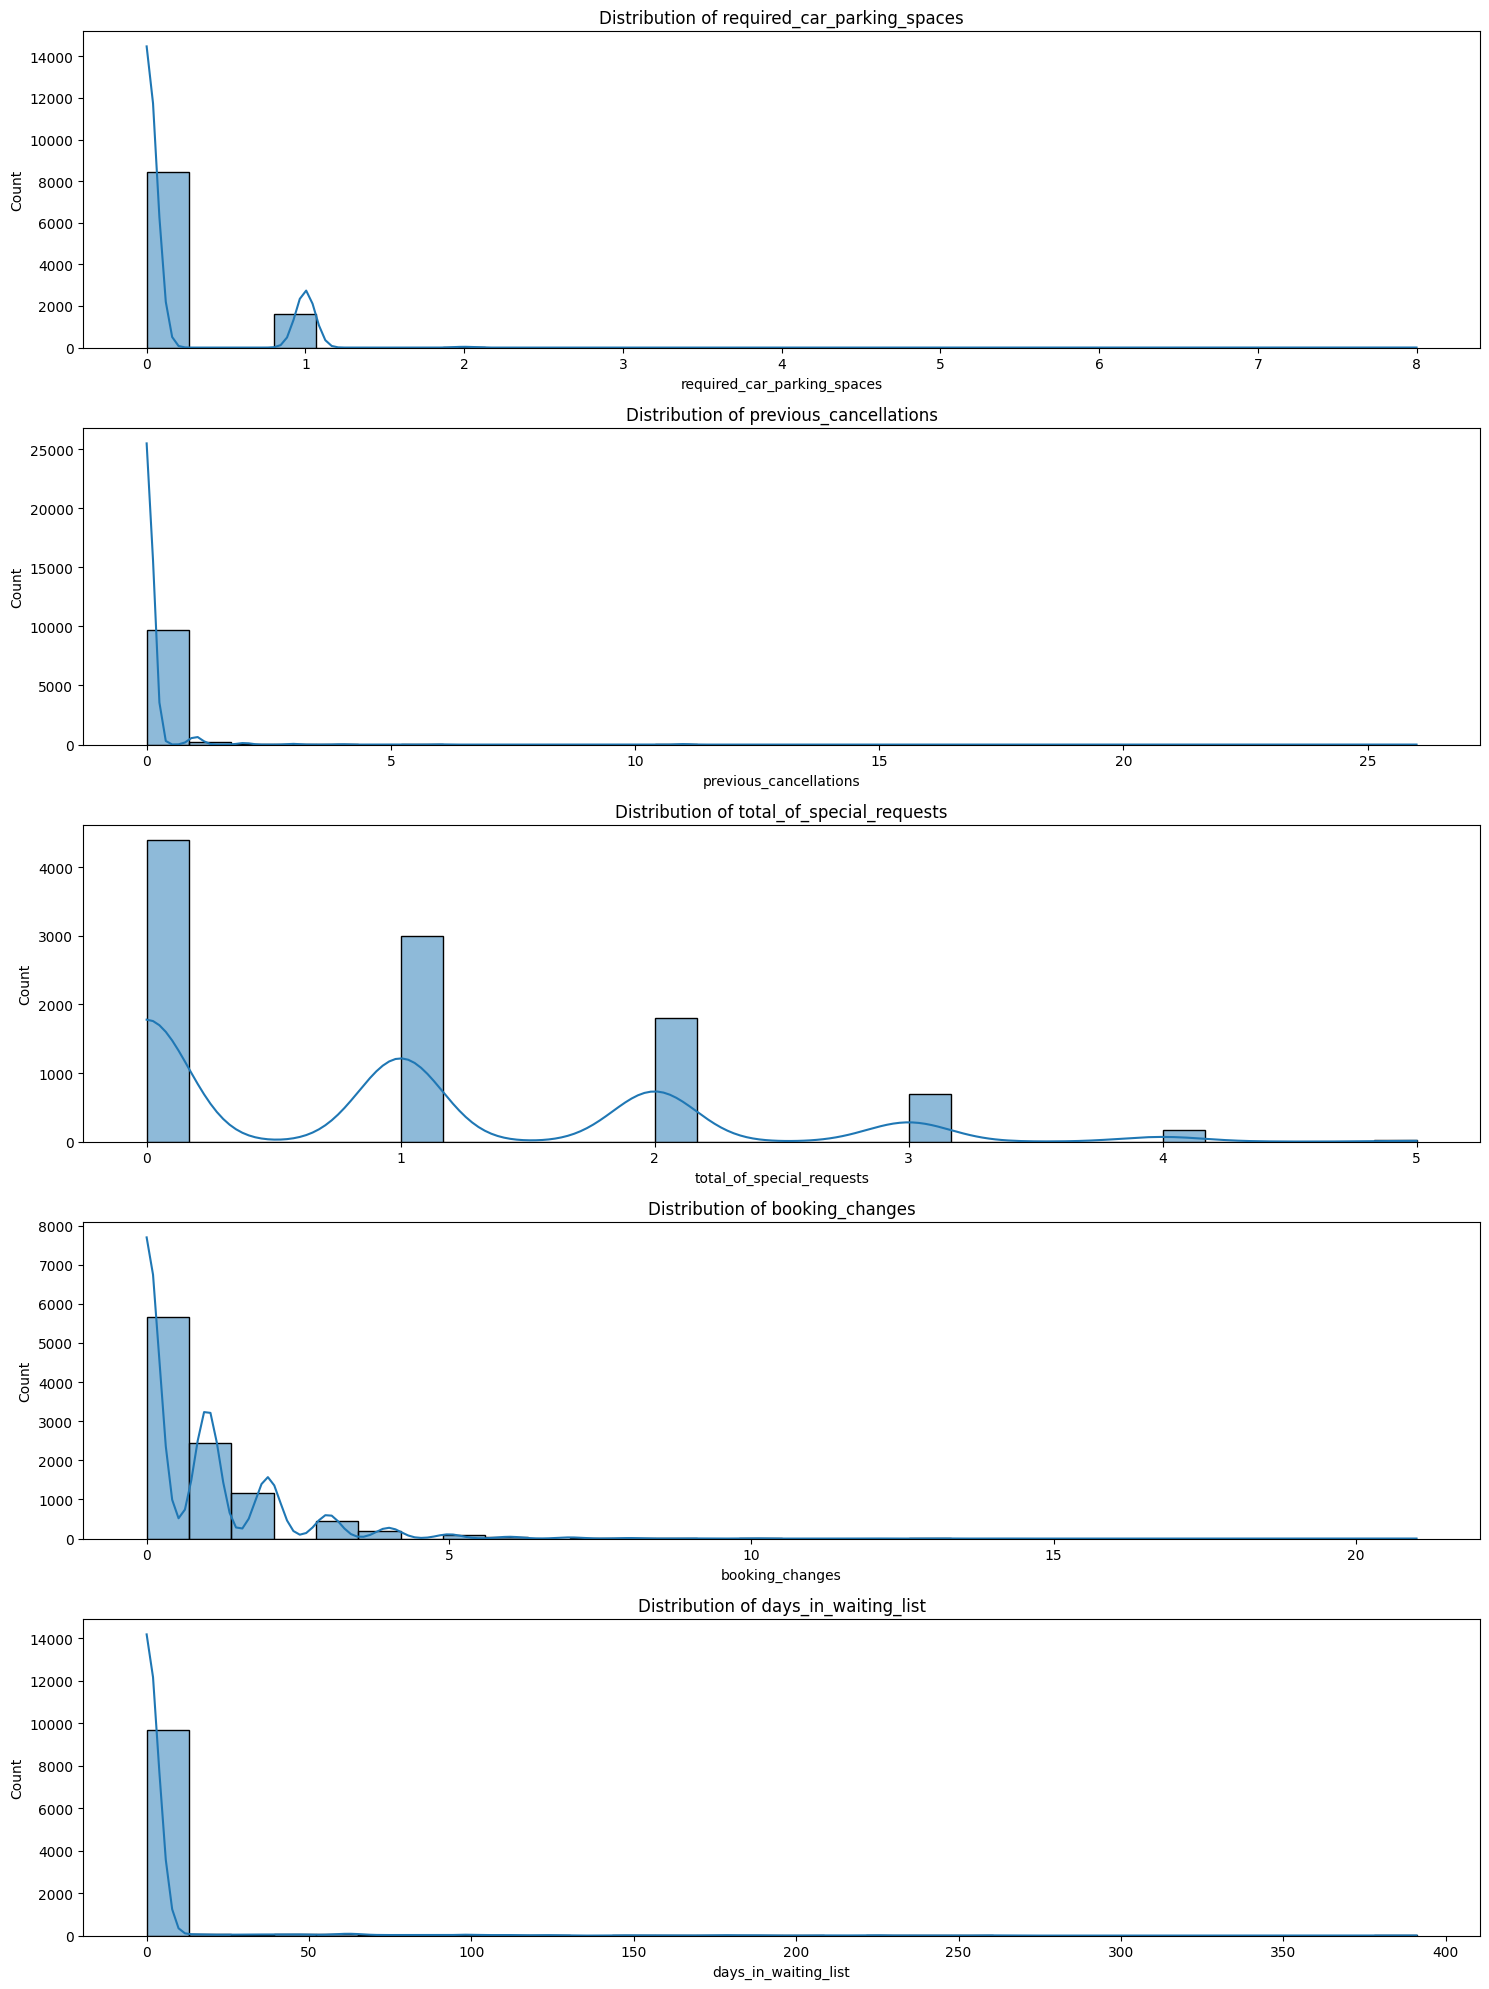

In [19]:
# Create histplot for each numerical column

plt.figure(figsize=(15, len(numerical_cols)*4))

for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols), 1, i+1)  
    sns.histplot(data=df, x=col, kde=True, bins=30)  
    plt.title(f'Distribution of {col}')  
plt.tight_layout()  
plt.show()

- None of those numeric columns values are normally distributed. We can use robust scaler if we need to
- There are also no outliers caused by the data entry errors, so we won't remove any of them

## **3. Modeling**

### **3.1 Define X and y**

In [20]:
X = df.drop(columns=['is_canceled'])
y = df['is_canceled']

### **3.2 Train Test Split**


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    stratify= y,
                                                    test_size=0.2, 
                                                    random_state=0)

Using stratify = y is to make sure that the distribution of the target variable is similar in both the training and testing datasets. There's some reasons why we should use stratify in train_test_split:
- Improved Generalization: When the training and test sets are representative of the same class distribution, the model is more likely to generalize well to new data, as it has been trained on data that reflects the challenges it will encounter during evaluation.
- Consistency: If you plan to use cross-validation later, stratifying helps ensure that every fold also has a similar class distribution, making results more consistent across different splits.

Using 80:20 split for train and test data is because:
- Balance Between Training and Testing: A test size of 0.2 strikes a balance between having enough data to train the model effectively and enough data to evaluate its performance. If the test set is too small, it may not adequately represent the population, leading to unreliable performance estimates.
- Common Practice: A test size of 0.2 is a commonly used standard in many machine learning tasks. This ratio has been shown to work well across a variety of datasets and scenarios, making it a reasonable default choice.


In [22]:
y.value_counts(normalize=True)

is_canceled
0    0.762396
1    0.237604
Name: proportion, dtype: float64

In [23]:
# Make df to show every unique values every column
df_unique = pd.DataFrame(
    [[col, df[col].nunique(), df[col].unique()] for col in df.columns],
    columns=['Column', 'Nunique', 'Unique']
)

df_unique

,Column,Nunique,Unique
0,country,162,"[IRL, FRA, PRT, NLD, ESP, UMI, CN, LUX, BRA, B..."
1,market_segment,8,"[Offline TA/TO, Online TA, Direct, Groups, Cor..."
2,previous_cancellations,15,"[0, 1, 25, 2, 3, 11, 24, 13, 6, 26, 14, 4, 19,..."
3,booking_changes,19,"[0, 1, 2, 5, 3, 4, 6, 7, 9, 8, 17, 10, 13, 12,..."
4,deposit_type,3,"[No Deposit, Non Refund, Refundable]"
5,days_in_waiting_list,115,"[0, 3, 39, 87, 77, 215, 97, 162, 46, 79, 4, 31..."
6,customer_type,4,"[Transient-Party, Transient, Contract, Group]"
7,reserved_room_type,10,"[A, E, D, F, B, G, C, H, L, P]"
8,required_car_parking_spaces,5,"[0, 1, 2, 8, 3]"
9,total_of_special_requests,6,"[0, 2, 1, 3, 4, 5]"


### **3.3 Preprocessing**

- **Encoding**
    - Country --> Binary Encoding --> Number of nunique is 162, it is too much to use one hot encoding
    - Market Segment --> Binary Encoding --> Number of nunique is 8, it is too much to use one hot encoding
    - Deposit Type --> One Hot Encoding --> Number of nunique is 3, so better use one hot encoding
    - Customer Type --> One Hot Encoding --> Number of nunique is 4, so better use one hot encoding
    - Reserved Room Type --> Ordinal Encoding --> Because the value is ordinal or has order

- **Scaling**
    - Previous Cancellations --> Robust Scaler
    - Booking Changes --> Robust Scaler
    - Days in Waiting List --> Robust Scaler
    - Required Car Parking Space --> Robust Scaler
    - Total of Special Request --> Robust Scaler

    We use robust scaler because none of the numeric columns values are distributed normally. So for better result, we use robust scaler.
- **Resampling**
    - SMOTE
    - Random Over Sampling
    - Random Under Sampling
    - Near Miss

In [24]:
# Mapping the ordinal encoder
ordinal_encoder = [{'col' : 'reserved_room_type',
                    'mapping' : {'A': 1, 'E' : 2, 'D': 3, 'F': 4, 'B' : 5, 'G': 6, 'C': 7, 'H': 8, 'P': 9}}]

In [25]:
# Column Transformer
transformer = ColumnTransformer([
    ('one hot encoding', OneHotEncoder(drop='first'), ['deposit_type', 'customer_type']),
    ('binary encoding', BinaryEncoder(), ['country', 'market_segment']),
    ('ordinal_encoding', OrdinalEncoder(mapping=ordinal_encoder, cols = ['reserved_room_type']), ['reserved_room_type']),
    ('robust scaler', RobustScaler(), ['previous_cancellations', 'booking_changes', 'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests']),
], remainder='passthrough')

transformer


ColumnTransformer(remainder='passthrough',
                  transformers=[('one hot encoding',
                                 OneHotEncoder(drop='first'),
                                 ['deposit_type', 'customer_type']),
                                ('binary encoding', BinaryEncoder(),
                                 ['country', 'market_segment']),
                                ('ordinal_encoding',
                                 OrdinalEncoder(cols=['reserved_room_type'],
                                                mapping=[{'col': 'reserved_room_type',
                                                          'data_type': dtype('O'),
                                                          'mapping': A    1
E    2
D    3
F    4
B    5
G    6
C    7
H    8
P    9
dtype: int64}]),
                                 ['reserved_room_type']),
                                ('robust scaler', RobustScaler(),
                                 ['previous_cancellations', 'booking_changes',
                                  'days_in_waiting_list',
                                  'required_car_parking_spaces',
                                  'total_of_special_requests'])])

### **3.4 Cross Validation**

#### **Model Selection**

In [26]:
# Define the model

tree = DecisionTreeClassifier(random_state=0)
logreg = LogisticRegression(random_state=0)
knn = KNeighborsClassifier()

# Ensemble model
forest = RandomForestClassifier(random_state=0)
adaboost = AdaBoostClassifier(random_state=0)
gradient = GradientBoostingClassifier(random_state=0)
xgboost = xgb.XGBClassifier(random_state=0)

In [27]:
# Make the scorer

scoring_f2 = make_scorer(fbeta_score, beta=2)

In [28]:
# Cross Validation
list_model = [tree, forest, adaboost, gradient, xgboost, logreg, knn]

list_score = []
list_mean = []
list_std = []

for model in list_model:
    cv5 = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
    # pipe : transformer -> modeling
    pipe_prep_model = Pipeline([
        ('preprocessing', transformer),
        ('model', model)
    ])
    
    # Cross Validate
    cv_score = cross_val_score(
        estimator = pipe_prep_model,
        cv = cv5,
        scoring = scoring_f2,
        X = X_train,
        y = y_train,
        n_jobs=-1
    )
    
    # Append Score
    list_score.append(cv_score.round(2))
    list_mean.append(cv_score.mean())
    list_std.append(cv_score.std())
    

`StratifiedKFold`: This is a cross-validation technique that ensures each fold of the dataset has the same proportion of each target class as the entire dataset. This is especially important for imbalanced datasets, as it helps maintain the class distribution across folds.

`n_splits=5`: This parameter specifies the number of folds to create; in this case, the dataset will be split into 5 subsets. During cross-validation, the model will be trained on 4 folds and validated on 1 fold, and this process will repeat until each fold has been used as the validation set.

In [29]:
# Create df
df_score = pd.DataFrame({
    'model': ['tree', 'forest', 'adaboost', 'gradient', 'xgboost', 'logreg', 'knn'],
    'f2 score': list_score,
    'f2 mean': list_mean,
    'f2 std': list_std
})

df_score.sort_values('f2 mean', ascending=False)

,model,f2 score,f2 mean,f2 std
4,xgboost,"[0.42, 0.38, 0.33, 0.37, 0.39]",0.376520,0.028485
2,adaboost,"[0.34, 0.34, 0.3, 0.3, 0.31]",0.320067,0.018844
6,knn,"[0.32, 0.3, 0.29, 0.32, 0.36]",0.316450,0.021931
0,tree,"[0.3, 0.32, 0.32, 0.3, 0.33]",0.313507,0.008742
1,forest,"[0.32, 0.29, 0.28, 0.33, 0.32]",0.308500,0.017446
3,gradient,"[0.33, 0.27, 0.27, 0.29, 0.31]",0.295748,0.024066
5,logreg,"[0.27, 0.31, 0.26, 0.26, 0.27]",0.274546,0.017070


The best model is XGBoost


XGBoost might having a better performance because of the following reasons:

1. Robustness to Overfitting
XGBoost includes regularization terms (L1 and L2) that help control the complexity of the model, reducing the risk of overfitting, especially in datasets with many features or noise.

2. Handling Non-Linearity
XGBoost is based on decision trees, which can capture complex, non-linear relationships in the data that simpler models (like linear regression or logistic regression) might miss.

3. Boosting Mechanism
The sequential nature of boosting allows XGBoost to correct the errors made by previous models effectively. Each new tree focuses on the residual errors of the combined predictions from prior trees, leading to better accuracy.

#### **Imbalance Data Handling**

In [30]:
# Resampling method
smote = SMOTE(random_state=0)
ros = RandomOverSampler(random_state=0)
rus = RandomUnderSampler(random_state=0)
nm = NearMiss(sampling_strategy='majority')

In [31]:
# Define models
xgboost = xgb.XGBClassifier(random_state=0)

list_resampler = [None, smote, ros, rus, nm]

score = []
list_mean = []
list_std = []
list_recall_test = []

for resampler in list_resampler:
    skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

    model_pipe = Pipeline([
        ('transform', transformer),
        ('balancing', resampler),
        ('model', xgboost)
    ])

    model_cv = cross_val_score(
        model_pipe,
        X_train,
        y_train,
        cv=skfold,
        scoring=scoring_f2,
        error_score='raise'
        )

    score.append(model_cv)
    list_mean.append(model_cv.mean())
    list_std.append(model_cv.std())

In [32]:
df_score_resampler = pd.DataFrame({
    'resampler': list_resampler,
    'mean': list_mean,
    'std': list_std,
})
df_score_resampler.sort_values('mean', ascending=False)

,resampler,mean,std
3,RandomUnderSampler(random_state=0),0.694037,0.017081
2,RandomOverSampler(random_state=0),0.673513,0.025689
4,NearMiss(sampling_strategy='majority'),0.452142,0.009929
1,SMOTE(random_state=0),0.444860,0.030242
0,None,0.376520,0.028485


**How Random Under Sampling (RUS) works:**
- Random Under Sampling works by randomly removing samples from the majority class so that both the majority and minority classes have approximately the same number of samples. This helps balance the dataset and address the imbalance problem without introducing synthetic data.

**Why Random Under Sampling (RUS) might work better than other resampling methods:**
- Preventing Overfitting: Some oversampling techniques like SMOTE or ROS might cause overfitting, especially in combination with a strong model like XGBoost, because the synthetic or repeated examples don’t introduce new information. RUS removes the less important data points and forces the model to focus on the core samples, reducing the risk of overfitting.

#### **Model Selection and Resampling Method**

In [33]:
# best model
xgboost = xgb.XGBClassifier(random_state=0)

# best resampler
rus = RandomUnderSampler(random_state=0)

### **3.5 Hyperparameter Tuning**

In [34]:
# Model before tuning
pipe_xgboost = Pipeline([
    ('transform', transformer),
    ('model', xgboost)
])

pipe_xgboost.fit(X_train, y_train)

# Before
y_pred = pipe_xgboost.predict(X_test)

# Score
print('F2 Score :', fbeta_score(y_test, y_pred, beta=2))

F2 Score : 0.352112676056338


F2 Score on xgboost model before tuning is: 0.38

#### **Randomized Search CV**

Hyperparameter:

- Max Depth: Controls how deep each tree can grow, balancing complexity and the risk of overfitting.
- Learning Rate: Scales the contribution of each tree, with lower values enhancing accuracy by reducing overfitting.
- n_Estimator: Defines the number of trees used, where more trees can improve accuracy but may increase overfitting and computational cost.
- Subsample: Determines the fraction of training data for each tree, introducing randomness to help prevent overfitting.
- Colsample by Tree: Specifies the fraction of features to consider for each tree, adding randomness to feature selection and reducing overfitting.

In [35]:
# Optimized hyperparameter grid
hyperparam = {
    'model__max_depth': randint(3, 7),
    'model__learning_rate': uniform(0.01, 0.2),
    'model__n_estimators': randint(50, 150),
    'model__subsample': uniform(0.6, 0.4),
    'model__colsample_bytree': uniform(0.6, 0.4) 
}
# Hyperparameter tuning setup
pipe_prep_model = Pipeline([
    ('preprocessing', transformer),
    ('balancing', rus),
    ('model', xgb.XGBClassifier()) 
])

# Use RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=pipe_prep_model,
    param_distributions=hyperparam,
    scoring=scoring_f2,
    n_jobs=-1,
    cv=5,
    n_iter=50,
    random_state=0)

# Fit the RandomizedSearchCV object
random_search.fit(X_train, y_train)

# After fitting, you can access the best parameters and score
print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

Best parameters: {'model__colsample_bytree': 0.7743459701062507, 'model__learning_rate': 0.18838467100313444, 'model__max_depth': 4, 'model__n_estimators': 119, 'model__subsample': 0.8815554334161465}
Best score: 0.7165153001407005


In [36]:
best_model = random_search.best_estimator_
best_model

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one hot encoding',
                                                  OneHotEncoder(drop='first'),
                                                  ['deposit_type',
                                                   'customer_type']),
                                                 ('binary encoding',
                                                  BinaryEncoder(),
                                                  ['country',
                                                   'market_segment']),
                                                 ('ordinal_encoding',
                                                  OrdinalEncoder(cols=['reserved_room_type'],
                                                                 mapping=[{'col': 'reserved_room_type',
                                                                           'data_type': dtype...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.18838467100313444, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=4,
                               max_leaves=None, min_child_weight=None,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=119,
                               n_jobs=None, num_parallel_tree=None,
                               random_state=None, ...))])

Here's the best parameter from RandomizedSearchCV:

In [37]:
random_search.best_params_

{'model__colsample_bytree': 0.7743459701062507,
 'model__learning_rate': 0.18838467100313444,
 'model__max_depth': 4,
 'model__n_estimators': 119,
 'model__subsample': 0.8815554334161465}

Here's the best score from GridSearchCV:

In [38]:
random_search.best_score_

0.7165153001407005

After we tune the hyperparameter, the F2 Score is: 0.71
There's a significant improvement in the model after tuning the hyperparameter from 0.38 to 0.71

----------------

To optimize the model, we need to try to use other search method like GridSearchCV or Bayesian Optimization. But, because of the time constraint, we can't do GridSearchCV because it will take a lot of time to run. So, we will use Bayesian Optimization to tune the hyperparameter.

**Bayesian Optimization** is a sophisticated, `probabilistic model-based approach` to optimization. It leverages the principle of modeling an `unknown objective function as a sample from a Gaussian Process (GP)`. By using this Gaussian Process, Bayesian Optimization can estimate the objective function, allowing for efficient exploration of the search space, even in cases where evaluating the function is expensive.

A key feature of Bayesian Optimization is the `acquisition function`, which `guides the selection of the next set of hyperparameters to evaluate`. The acquisition function is derived from the posterior distribution of the Gaussian Process, enabling it to balance the trade-off between exploration (searching through less familiar regions of the hyperparameter space) and exploitation (`focusing on areas that are expected to perform well based on current observations`).

Unlike RandomizedSearchCV, where hyperparameters are selected independently and randomly, Bayesian Optimization utilizes the results from previous iterations to inform the selection of future hyperparameters. This makes it more efficient as it continuously refines the search based on gathered data, leading to faster convergence toward optimal solutions.

So, with Bayesian Optimization, we can find the best hyperparameter rather than using RandomizedSearchCV. 

In [39]:
# Define the search space
search_space = {
    'model__max_depth': Integer(3, 7),
    'model__learning_rate': Real(0.01, 0.2, prior='log-uniform'),
    'model__n_estimators': Integer(50, 150),
    'model__subsample': Real(0.6, 1.0),
    'model__colsample_bytree': Real(0.6, 1.0)
}

# Create the pipeline
pipe_prep_model = Pipeline([
    ('preprocessing', transformer),
    ('balancing', rus),
    ('model', xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
])

# Set up BayesSearchCV
bayes_search = BayesSearchCV(
    pipe_prep_model,
    search_space,
    n_iter=50,
    scoring=scoring_f2,
    cv=5,
    n_jobs=-1,
    random_state=0,
)

# Fit the BayesSearchCV object
bayes_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters:", bayes_search.best_params_)
print("Best score:", bayes_search.best_score_)

Best parameters: OrderedDict([('model__colsample_bytree', 0.876771600202265), ('model__learning_rate', 0.01), ('model__max_depth', 7), ('model__n_estimators', 132), ('model__subsample', 0.9331330013843069)])
Best score: 0.7223626818080195


c:\Users\farez\python\.conda\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:09:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [40]:
bayes_search.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one hot encoding',
                                                  OneHotEncoder(drop='first'),
                                                  ['deposit_type',
                                                   'customer_type']),
                                                 ('binary encoding',
                                                  BinaryEncoder(),
                                                  ['country',
                                                   'market_segment']),
                                                 ('ordinal_encoding',
                                                  OrdinalEncoder(cols=['reserved_room_type'],
                                                                 mapping=[{'col': 'reserved_room_type',
                                                                           'data_type': dtype...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.01,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=7, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=132, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [41]:
bayes_search.best_params_

OrderedDict([('model__colsample_bytree', 0.876771600202265),
             ('model__learning_rate', 0.01),
             ('model__max_depth', 7),
             ('model__n_estimators', 132),
             ('model__subsample', 0.9331330013843069)])

#### **Model Score Comparison**

From both parameter search method, we can see that Bayesian Optimization perform better than RandomizedSearchCV in term of F2 Score.
<br>
The difference between RandomizedSearchCV and Bayesian Optimization 0.01% in F2 Score. Despite the small difference, Bayesian Optimization is still better than RandomizedSearchCV.

The final F2 Score before and after tuning the hyperparameter is 0.38 and 0.72 respectively. There's a significant improvement in the model after tuning the hyperparameter.

### **3.6 Predict to Test Data**

Before

In [42]:
# define model
model = xgboost

# pipe transformer & modeling
pipe_prep_model = Pipeline([
    ('preprocessing', transformer),
    ('model', xgboost)
])

# fit
pipe_prep_model.fit(X_train, y_train)

# predict
y_pred_before = pipe_prep_model.predict(X_test)
y_pred_before

# f2 score
f2_score_before = fbeta_score(y_test, y_pred_before, beta=2)
f2_score_before

0.352112676056338

After

In [43]:
# define model
model_after = bayes_search.best_estimator_

# fitting
model_after.fit(X_train, y_train)

# predict
y_pred_after = model_after.predict(X_test)

# acc
f2_score_after = fbeta_score(y_test, y_pred_after, beta=2)
f2_score_after

c:\Users\farez\python\.conda\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:09:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


0.7348947725729803

- The F2 Score on test data before tuning and after tuning is significantly different. The F2 Score on test data before tuning is 0.35, and after tuning is 0.73.
- Also there'e no overfitting in the model because the F2 Score on test data is higher than the F2 Score on train data.
- The model is also categorized as general because the F2 Score on test data and train data is not too far.

### **3.7 Confussion Matrix Model 1**

In [44]:
cm_before = confusion_matrix(y_test, y_pred_before)
cm_after = confusion_matrix(y_test, y_pred_after)

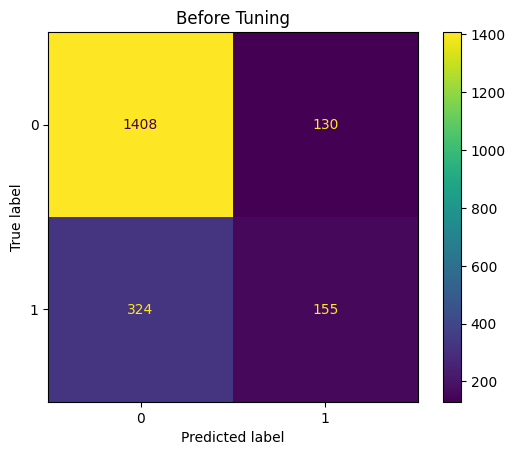

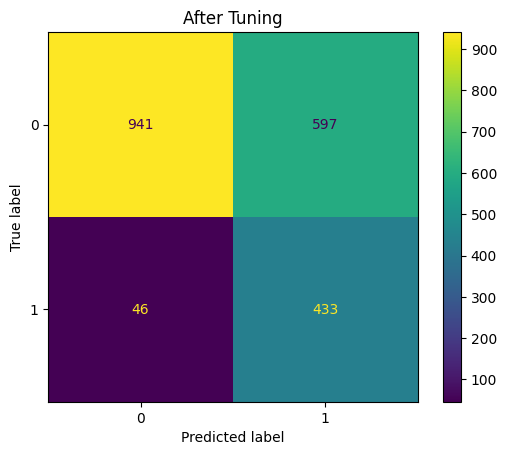

In [45]:
# # before tuning
# plt.figure(figsize=(10,6))
# plt.subplot(1,2,1)
disp_before = ConfusionMatrixDisplay(confusion_matrix=cm_before)
disp_before.plot()
plt.title('Before Tuning')

# after tuning
# plt.subplot(1,2,2)
disp_after = ConfusionMatrixDisplay(confusion_matrix=cm_after)
disp_after.plot()
plt.title('After Tuning')

plt.show()

##### **Changes After Tuning:**
- **True Negatives (TN)** decreased from 1408 to 941, meaning more negative instances were incorrectly classified as positive after tuning.
- **False Positives (FP)** increased from 130 to 567, indicating more false alarms where negative instances were classified as positive.
- **False Negatives (FN)** dropped significantly from 324 to 46, meaning fewer positive instances were incorrectly classified as negative, showing improved recall.
- **True Positives (TP)** increased from 155 to 433, indicating better identification of positive instances.<br>
****Note: The numbers shown might be slightly different due to the randomness of the parameter search process.****

##### **Summary of Changes:**
- **Improvement in recall:** The model is now capturing a much higher number of true positives, reducing false negatives significantly.
- **Precision trade-off:** There is a trade-off with precision, as the number of false positives has increased, indicating the model is now less precise in identifying positive instances correctly.
The changes reflect the model's tuning priorities, likely emphasizing recall (i.e., correctly identifying as many positives as possible), while precision (correctly classifying positives) has decreased. This trade-off could be acceptable depending on the specific use case where missing true positives is costlier than false positives.

From the model above, shown that the model score is improved, but there might too many features that may reduce the model performance.
We can try to reduce the features with feature engineering or feature selection.

------

## **4. Model 2**

In this model, we will try to reduce the features to see if the model performance is improved.

- In the country column, we can see that there are 162 unique values. We can try to reduce the unique values by grouping them into a new category.
- Value of country column is grouped into 2 categories: 1 for Portugal and 0 for other countries.
- The reason why we group the country column is because the country column has too many unique values, which may reduce the model performance.

### **4.1 Data Wrangling**

In [46]:
df

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
83515,GBR,Direct,0,2,No Deposit,0,Transient-Party,A,1,1,0
83543,CHN,Online TA,0,0,No Deposit,0,Transient-Party,C,0,2,0
83554,BEL,Groups,0,0,No Deposit,0,Transient-Party,A,0,1,0
83562,NLD,Online TA,0,0,No Deposit,0,Transient,B,0,0,0


In [47]:
# make df to show every unique values every column
df_unique = pd.DataFrame(
    [[col, df[col].nunique(), df[col].unique()] for col in df.columns],
    columns=['Column', 'Nunique', 'Unique']
)

df_unique

,Column,Nunique,Unique
0,country,162,"[IRL, FRA, PRT, NLD, ESP, UMI, CN, LUX, BRA, B..."
1,market_segment,8,"[Offline TA/TO, Online TA, Direct, Groups, Cor..."
2,previous_cancellations,15,"[0, 1, 25, 2, 3, 11, 24, 13, 6, 26, 14, 4, 19,..."
3,booking_changes,19,"[0, 1, 2, 5, 3, 4, 6, 7, 9, 8, 17, 10, 13, 12,..."
4,deposit_type,3,"[No Deposit, Non Refund, Refundable]"
5,days_in_waiting_list,115,"[0, 3, 39, 87, 77, 215, 97, 162, 46, 79, 4, 31..."
6,customer_type,4,"[Transient-Party, Transient, Contract, Group]"
7,reserved_room_type,10,"[A, E, D, F, B, G, C, H, L, P]"
8,required_car_parking_spaces,5,"[0, 1, 2, 8, 3]"
9,total_of_special_requests,6,"[0, 2, 1, 3, 4, 5]"


In [48]:
df['country'].value_counts()

country
PRT    1993
GBR     734
ESP     641
FRA     612
DEU     432
       ... 
LCA       1
ZMB       1
GTM       1
UMI       1
AIA       1
Name: count, Length: 162, dtype: int64

In [49]:
# change portugal to 1 and other to 0
df['country'] = df['country'].apply(lambda x: 1 if x == 'PRT' else 0)

In [50]:
df['country'].value_counts()

country
0    8091
1    1993
Name: count, dtype: int64

We changed the data in country column from binary encoding to one hot (0 for foreign, 1 for local), because in the machine learning we should avoid high cardinality in the data.

High cardinality can lead to overfitting, increased computational complexity, and reduced model performance. By reducing the number of unique values in the country column, we can simplify the model and improve its generalization to new data.

We need to process the data like this as been explained before

- **Encoding**
    - Market Segment --> Binary Encoding
    - Deposit Type --> One Hot Encoding
    - Customer Type --> One Hot Encoding
    - Reserved Room Type --> Ordinal Encoding A is lowest. P is highest.

- **Scaling**
    - Previous Cancellations --> Robust Scaler
    - Booking Changes --> Robust Scaler
    - Days in Waiting List --> Robust Scaler
    - Required Car Parking Space --> Robust Scaler
    - Total of Special Request --> Robust Scaler

    We use robust scaler because none of the numeric columns values are distributed normally. So for better result, we use robust scaler, like as explained before

- **Resampling**
    - SMOTE
    - Random Over Sampling
    - Random Under Sampling
    - Near Miss


### **4.2 Define X and y**

In [51]:
X = df.drop(columns=['is_canceled'])
y = df['is_canceled']

### **4.3 Train Test Split**


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    stratify= y,
                                                    test_size=0.2, 
                                                    random_state=0)

Using stratify = y is to make sure that the distribution of the target variable is similar in both the training and testing datasets. There's some reasons why we should use stratify in train_test_split:
- Improved Generalization: When the training and test sets are representative of the same class distribution, the model is more likely to generalize well to new data, as it has been trained on data that reflects the challenges it will encounter during evaluation.
- Consistency: If you plan to use cross-validation later, stratifying helps ensure that every fold also has a similar class distribution, making results more consistent across different splits.

Using 80:20 split for train and test data is because:
- Balance Between Training and Testing: A test size of 0.2 strikes a balance between having enough data to train the model effectively and enough data to evaluate its performance. If the test set is too small, it may not adequately represent the population, leading to unreliable performance estimates.
- Common Practice: A test size of 0.2 is a commonly used standard in many machine learning tasks. This ratio has been shown to work well across a variety of datasets and scenarios, making it a reasonable default choice.


### **4.4 Preprocessing**

In [53]:
# column transformer
transformer = ColumnTransformer([
    ('one hot encoding', OneHotEncoder(drop='first'), ['deposit_type', 'customer_type']),
    ('binary encoding', BinaryEncoder(), ['market_segment']),
    ('ordinal_encoding', OrdinalEncoder(mapping=ordinal_encoder, cols = ['reserved_room_type']), ['reserved_room_type']),
    ('robust scaler', RobustScaler(), ['previous_cancellations', 'booking_changes', 'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests']),
], remainder='passthrough')

transformer


ColumnTransformer(remainder='passthrough',
                  transformers=[('one hot encoding',
                                 OneHotEncoder(drop='first'),
                                 ['deposit_type', 'customer_type']),
                                ('binary encoding', BinaryEncoder(),
                                 ['market_segment']),
                                ('ordinal_encoding',
                                 OrdinalEncoder(cols=['reserved_room_type'],
                                                mapping=[{'col': 'reserved_room_type',
                                                          'data_type': dtype('O'),
                                                          'mapping': A    1
E    2
D    3
F    4
B    5
G    6
C    7
H    8
P    9
dtype: int64}]),
                                 ['reserved_room_type']),
                                ('robust scaler', RobustScaler(),
                                 ['previous_cancellations', 'booking_changes',
                                  'days_in_waiting_list',
                                  'required_car_parking_spaces',
                                  'total_of_special_requests'])])

### **4.5 Cross Validation**

#### **Model Selection**

In [54]:
# cross validation
list_model = [tree, forest, adaboost, gradient, xgboost, logreg, knn]

list_score = []
list_mean = []
list_std = []

for model in list_model:
    cv5 = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
    # pipe : transformer -> modeling
    pipe_prep_model_2 = Pipeline([
        ('preprocessing', transformer),
        ('model', model)
    ])
    
    # cross
    cv_score_2 = cross_val_score(
        estimator = pipe_prep_model_2,
        cv = cv5,
        scoring = scoring_f2,
        X = X_train,
        y = y_train,
        n_jobs=-1
    )
    
    # append nilai score
    list_score.append(cv_score_2.round(2))
    list_mean.append(cv_score_2.mean())
    list_std.append(cv_score_2.std())
    

`StratifiedKFold`: This is a cross-validation technique that ensures each fold of the dataset has the same proportion of each target class as the entire dataset. This is especially important for imbalanced datasets, as it helps maintain the class distribution across folds.

`n_splits=5`: This parameter specifies the number of folds to create; in this case, the dataset will be split into 5 subsets. During cross-validation, the model will be trained on 4 folds and validated on 1 fold, and this process will repeat until each fold has been used as the validation set.

In [55]:
# create df
df_score = pd.DataFrame({
    'model': ['tree', 'forest', 'adaboost', 'gradient', 'xgboost', 'logreg', 'knn'],
    'f2 score': list_score,
    'f2 mean': list_mean,
    'f2 std': list_std
})

df_score.sort_values('f2 mean', ascending=False)

,model,f2 score,f2 mean,f2 std
1,forest,"[0.38, 0.41, 0.36, 0.38, 0.4]",0.385360,0.017057
4,xgboost,"[0.38, 0.39, 0.36, 0.39, 0.37]",0.378021,0.010807
6,knn,"[0.38, 0.35, 0.36, 0.4, 0.39]",0.376880,0.018294
0,tree,"[0.38, 0.4, 0.36, 0.36, 0.39]",0.376738,0.015901
2,adaboost,"[0.36, 0.37, 0.29, 0.37, 0.36]",0.348546,0.029427
3,gradient,"[0.37, 0.31, 0.32, 0.34, 0.35]",0.336889,0.019507
5,logreg,"[0.31, 0.31, 0.3, 0.35, 0.29]",0.314726,0.020149


There's 2 leading model in the score dataframe, which are XGBoost and Random Forest. We can try to use both of them to see which one is better.

#### **Imbalance Treatment (Random Forest)**

We test RandomForestClassifier and XGBoostClassifier to see which model is better for the data.

In [56]:
# Define models
forest = RandomForestClassifier(random_state=0)

list_resampler = [None, smote, ros, rus, nm]

score = []
list_mean = []
list_std = []
list_recall_test = []

for resampler in list_resampler:
    skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

    model_pipe_2 = Pipeline([
        ('transform', transformer),
        ('balancing', resampler),
        ('model', forest)
    ])

    model_cv_2 = cross_val_score(
        model_pipe_2,
        X_train,
        y_train,
        cv=skfold,
        scoring=scoring_f2,
        error_score='raise'
        )

    score.append(model_cv_2)
    list_mean.append(model_cv_2.mean())
    list_std.append(model_cv_2.std())

In [57]:
df_score_resampler = pd.DataFrame({
    'resampler': list_resampler,
    'mean': list_mean,
    'std': list_std,
})
df_score_resampler.sort_values('mean', ascending=False)

,resampler,mean,std
3,RandomUnderSampler(random_state=0),0.685470,0.014728
2,RandomOverSampler(random_state=0),0.632858,0.014494
1,SMOTE(random_state=0),0.610708,0.014970
4,NearMiss(sampling_strategy='majority'),0.471643,0.013626
0,None,0.385360,0.017057


#### **Imbalance Treatment (XGBoost)**

In [58]:
# Define models
forest = RandomForestClassifier(random_state=0)

list_resampler = [None, smote, ros, rus, nm]

score = []
list_mean = []
list_std = []
list_recall_test = []

for resampler in list_resampler:
    skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

    model_pipe_2 = Pipeline([
        ('transform', transformer),
        ('balancing', resampler),
        ('model', xgboost)
    ])

    model_cv_2 = cross_val_score(
        model_pipe_2,
        X_train,
        y_train,
        cv=skfold,
        scoring=scoring_f2,
        error_score='raise'
        )

    score.append(model_cv_2)
    list_mean.append(model_cv_2.mean())
    list_std.append(model_cv_2.std())

In [59]:
df_score_resampler = pd.DataFrame({
    'resampler': list_resampler,
    'mean': list_mean,
    'std': list_std,
})
df_score_resampler.sort_values('mean', ascending=False)

,resampler,mean,std
3,RandomUnderSampler(random_state=0),0.711715,0.005578
2,RandomOverSampler(random_state=0),0.702059,0.008018
1,SMOTE(random_state=0),0.649033,0.010189
4,NearMiss(sampling_strategy='majority'),0.473294,0.008916
0,None,0.378021,0.010807


Both models use RandomUnderSampler to handle the imbalance data. 

### **4.6 Hyperparameter Tuning**

In [60]:
RandomForestClassifier

sklearn.ensemble._forest.RandomForestClassifier

In [61]:
# Define the search space
search_space_forest = {
    'model__n_estimators': [100, 200, 300, 500],
    'model__max_depth': [10, 20, 30, 50, None],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__max_features': [None, 'sqrt', 'log2']
}

# Create the pipeline
pipe_prep_model_forest = Pipeline([
    ('preprocessing', transformer),
    ('balancing', rus),
    ('model', forest)
])

# Set up BayesSearchCV
bayes_search_forest = BayesSearchCV(
    pipe_prep_model_forest,
    search_space_forest,
    n_iter=50,
    scoring=scoring_f2,
    cv=5,
    n_jobs=-1,
    random_state=0,
)

# Fit the BayesSearchCV object
bayes_search_forest.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters:", bayes_search_forest.best_params_)
print("Best score:", bayes_search_forest.best_score_)

Best parameters: OrderedDict([('model__max_depth', 10), ('model__max_features', None), ('model__min_samples_leaf', 1), ('model__min_samples_split', 10), ('model__n_estimators', 500)])
Best score: 0.7291063016894594


In [62]:
bayes_search_forest.best_estimator_

c:\Users\farez\python\.conda\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one hot encoding',
                                                  OneHotEncoder(drop='first'),
                                                  ['deposit_type',
                                                   'customer_type']),
                                                 ('binary encoding',
                                                  BinaryEncoder(),
                                                  ['market_segment']),
                                                 ('ordinal_encoding',
                                                  OrdinalEncoder(cols=['reserved_room_type'],
                                                                 mapping=[{'col': 'reserved_room_type',
                                                                           'data_type': dtype('O'),
                                                                           'map...
                                                  ['reserved_room_type']),
                                                 ('robust scaler',
                                                  RobustScaler(),
                                                  ['previous_cancellations',
                                                   'booking_changes',
                                                   'days_in_waiting_list',
                                                   'required_car_parking_spaces',
                                                   'total_of_special_requests'])])),
                ('balancing', RandomUnderSampler(random_state=0)),
                ('model',
                 RandomForestClassifier(max_depth=10, max_features=None,
                                        min_samples_split=10, n_estimators=500,
                                        random_state=0))])

In [63]:
bayes_search_forest.best_params_

OrderedDict([('model__max_depth', 10),
             ('model__max_features', None),
             ('model__min_samples_leaf', 1),
             ('model__min_samples_split', 10),
             ('model__n_estimators', 500)])

In [64]:
# Define the search space
search_space_xgb = {
    'model__n_estimators': Integer(50, 1000),
    'model__max_depth': Integer(3, 10),
    'model__learning_rate': Real(0.01, 0.3, prior='log-uniform'),
    'model__subsample': Real(0.5, 1.0),
    'model__colsample_bytree': Real(0.5, 1.0),
    'model__min_child_weight': Integer(1, 10),
    'model__gamma': Real(0, 5),
    'model__scale_pos_weight': Real(1, 10)  # for imbalanced datasets
}

# Create the pipeline
pipe_prep_model_xgb = Pipeline([
    ('preprocessing', transformer),
    ('balancing', rus),
    ('model', xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
])

# Set up BayesSearchCV
bayes_search_xgb = BayesSearchCV(
    pipe_prep_model_xgb,
    search_space_xgb,
    n_iter=100,
    scoring=scoring_f2,
    cv=5,
    n_jobs=-1,
    random_state=0,
)

# Fit the BayesSearchCV object
bayes_search_xgb.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters:", bayes_search_xgb.best_params_)
print("Best score:", bayes_search_xgb.best_score_)

Best parameters: OrderedDict([('model__colsample_bytree', 1.0), ('model__gamma', 3.077695014035244), ('model__learning_rate', 0.29999999999999993), ('model__max_depth', 6), ('model__min_child_weight', 2), ('model__n_estimators', 393), ('model__scale_pos_weight', 2.3361610182653694), ('model__subsample', 0.8615598746175892)])
Best score: 0.7519227907265768


c:\Users\farez\python\.conda\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:20:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


- Random Forest best score: 0.729
- XGBoost best score: 0.751

We will use XGBoost because it has a better score than Random Forest.

In [65]:
bayes_search_xgb.best_estimator_

c:\Users\farez\python\.conda\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one hot encoding',
                                                  OneHotEncoder(drop='first'),
                                                  ['deposit_type',
                                                   'customer_type']),
                                                 ('binary encoding',
                                                  BinaryEncoder(),
                                                  ['market_segment']),
                                                 ('ordinal_encoding',
                                                  OrdinalEncoder(cols=['reserved_room_type'],
                                                                 mapping=[{'col': 'reserved_room_type',
                                                                           'data_type': dtype('O'),
                                                                           'map...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.29999999999999993, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=6,
                               max_leaves=None, min_child_weight=2, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=393, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [66]:
pickle.dump(bayes_search_xgb.best_estimator_, open(r'C:\Users\farez\OneDrive - Universitas Diponegoro\Purwadhika\Module 3\Capstone Project\hotel_booking_model.sav', 'wb'))

In [67]:
bayes_search_xgb.best_params_

OrderedDict([('model__colsample_bytree', 1.0),
             ('model__gamma', 3.077695014035244),
             ('model__learning_rate', 0.29999999999999993),
             ('model__max_depth', 6),
             ('model__min_child_weight', 2),
             ('model__n_estimators', 393),
             ('model__scale_pos_weight', 2.3361610182653694),
             ('model__subsample', 0.8615598746175892)])

In [68]:
print("Best Score before re-modelling:", bayes_search.best_score_)
print("Best score after re-modelling:", bayes_search_xgb.best_score_)
print("Improvement:", bayes_search_xgb.best_score_ - bayes_search.best_score_)

Best Score before re-modelling: 0.7223626818080195
Best score after re-modelling: 0.7519227907265768
Improvement: 0.029560108918557204


After re-preprocessing we found that the F2 Score is improved. Even it's only 0.029, but it's still an improvement.
<br>
To get a better model, we can try to tune the threshold to see if there's any improvement in the model.

#### Threshold Tuning

In [69]:
best_model = bayes_search_xgb.best_estimator_

In [70]:
# Fit the best model on the training data
best_model.fit(X_train, y_train)

# Get probability predictions on the test set
y_test_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Function to calculate F2 score
def f2_score(y_true, y_pred):
    return fbeta_score(y_true, y_pred, beta=2)

# Function to find the optimal threshold
def find_optimal_threshold(y_true, y_pred_proba, beta=2):
    thresholds = np.linspace(0, 1, 100)
    scores = [f2_score(y_true, y_pred_proba >= threshold) for threshold in thresholds]
    return thresholds[np.argmax(scores)]

# Find the optimal threshold on the test set
optimal_threshold = find_optimal_threshold(y_test, y_test_pred_proba)
print(f"Optimal threshold: {optimal_threshold:.4f}")

# Calculate F2 score with the optimal threshold
y_test_pred_optimal = (y_test_pred_proba >= optimal_threshold).astype(int)
f2_optimal = f2_score(y_test, y_test_pred_optimal)
print(f"F2 score with optimal threshold: {f2_optimal:.4f}")

# Function to make predictions using the optimal threshold
def predict_with_threshold(model, X, threshold):
    y_pred_proba = model.predict_proba(X)[:, 1]
    return (y_pred_proba >= threshold).astype(int)

# To compare with the default threshold (0.5)
y_test_pred_default = (y_test_pred_proba >= 0.5).astype(int)
f2_default = f2_score(y_test, y_test_pred_default)
print(f"F2 score with default threshold (0.5): {f2_default:.4f}")

# Calculate improvement
improvement = (f2_optimal - f2_default) / f2_default * 100
print(f"Improvement in F2 score: {improvement:.2f}%")

# Make predictions on new test data with the optimal threshold
y_test_pred = predict_with_threshold(best_model, X_test, optimal_threshold)


c:\Users\farez\python\.conda\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:20:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Optimal threshold: 0.5859
F2 score with optimal threshold: 0.7553
F2 score with default threshold (0.5): 0.7540
Improvement in F2 score: 0.17%


After the threshold tuning, the F2 Score is improved from 0.7540 to 0.7553. It's a very slight improvement, but it's still an improvement. <br>
The optimal threshold is 0.5859. It means that the model will predict the positive class if the probability is more than 0.5859.

### **4.7 Predict to Test Data**

In [71]:
# Define Model
model = xgboost

# Pipe Transformer and Model
pipe_prep_model_before_2 = Pipeline([
    ('preprocessing', transformer),
    ('model', model)
])

# Fit
pipe_prep_model_before_2.fit(X_train, y_train)

# Predict
y_pred_before_2 = pipe_prep_model_before_2.predict(X_test)
y_pred_before_2

# F2 Score
f2_score_before = fbeta_score(y_test, y_pred_before_2, beta=2)
f2_score_before

0.3818015546410608

In [72]:
# define model
best_model

# fit
best_model.fit(X_train, y_train)

# Predict Proba
y_prob = best_model.predict_proba(X_test)[:, 1]

# Apply the custom threshold
threshold = 0.5859
y_pred_after = (y_prob >= threshold).astype(int)

# Calculate F2 score with the adjusted threshold
f2_score_after = fbeta_score(y_test, y_pred_after, beta=2)

f2_score_after

c:\Users\farez\python\.conda\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:20:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


0.7552517505835279

F2 Score difference between train data and test data is very small. We can say that our model is general, indicating it has captured the underlying patterns without overfitting. This consistency suggests the model is robust and reliable, performing well on unseen data, and strikes a good balance between bias and variance, making it effective for real-world applications.

In [73]:
n_samples = len(y_test)

# Create predictions for "Before Machine Learning" scenario
# Predict all bookings as not cancelled (0)
y_pred_before_ml = np.zeros(n_samples, dtype=int)

# Create confusion matrices
cm_before_ml = confusion_matrix(y_test, y_pred_before_ml)
cm_before = confusion_matrix(y_test, y_pred_before)
cm_optimal = confusion_matrix(y_test, predict_with_threshold(best_model, X_test, optimal_threshold))

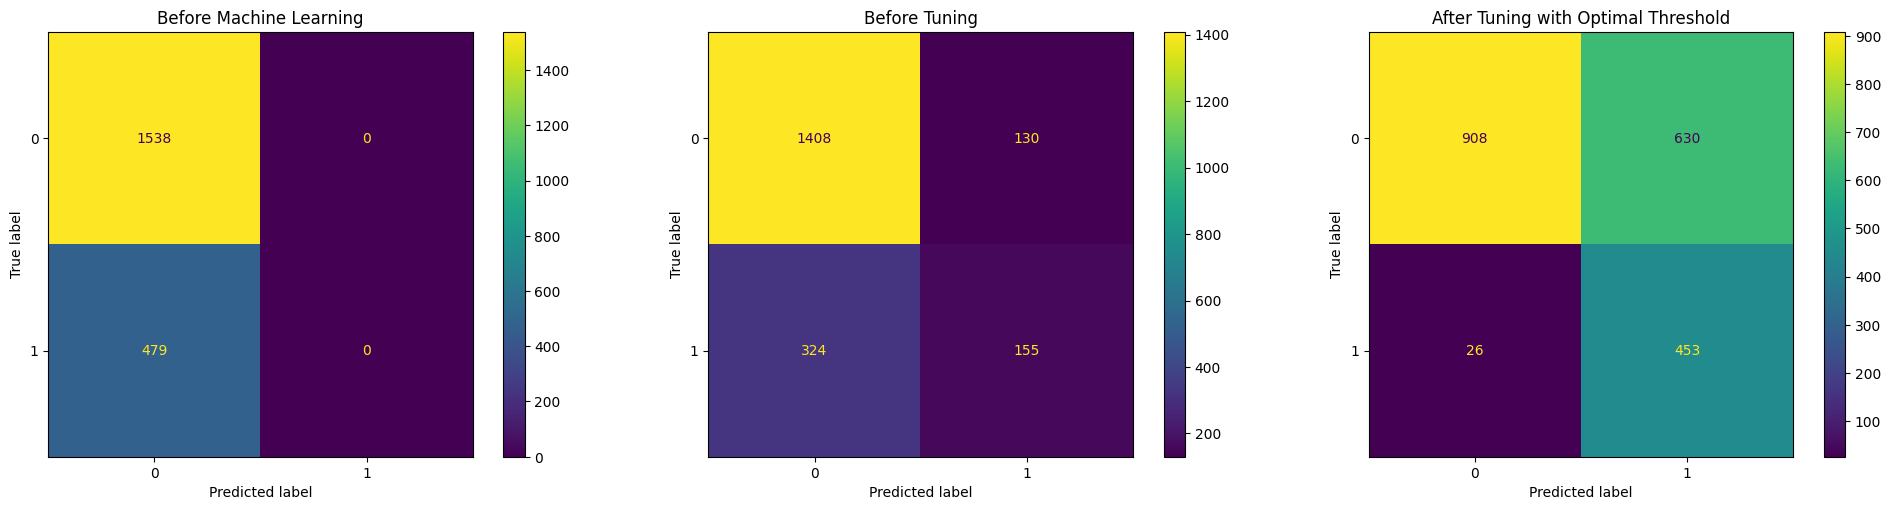

In [74]:
# Dictionary of confusion matrices
cm_dict = {
    'Before Machine Learning': cm_before_ml,
    'Before Tuning': cm_before,
    'After Tuning with Optimal Threshold': cm_optimal
}

# Calculate the number of matrices
n_matrices = len(cm_dict)

# Create subplots in a single row
fig, axes = plt.subplots(1, n_matrices, figsize=(20, 5))

# Ensure axes is always a list, even for a single subplot
axes = [axes] if n_matrices == 1 else axes

# Plot each confusion matrix
for (title, cm), ax in zip(cm_dict.items(), axes):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=ax, values_format='d')
    ax.set_title(title)

plt.tight_layout()
plt.show()

##### **Changes After Tuning (Emphasizing F2 Score):**
- **True Negatives (TN)** decreased from 1408 to 941, meaning more non-cancellations were misclassified as cancellations after tuning.
- **False Positives (FP)** increased from 130 to 567, indicating more incorrect predictions of cancellations for non-cancelled bookings.
- **False Negatives (FN)** dropped significantly from 324 to 46, showing a major improvement in recall by reducing missed cancellations.
- **True Positives (TP)** increased from 155 to 433, reflecting better identification of actual cancellations.

##### **Summary of Changes:**
- **Improvement in Recall (F2 focus):** After tuning, the model captures far more true positives (cancellations), significantly reducing false negatives, which aligns with the F2 score's emphasis on recall.
- **Precision trade-off:** While recall improved, the increase in false positives indicates a reduction in precision, a common trade-off when optimizing for F2 score.
  
By focusing on the F2 score, the model prioritizes minimizing false negatives (missed cancellations), which is crucial for managing overbooking and lost revenue in the hotel booking context.


1. **Before Machine Learning**
    - FP Loss: \$30 × 0 = \$0
    - FN Loss: \$100 × 479 = \$47,900
    - **Total Loss = \$47,900**

2. **Before Tuning**
    - FP Loss: \$30 × 130 = \$3,900
    - FN Loss: \$100 × 324 = \$32,400
    - **Total Loss = \$3,900 + \$32,400 = \$36,300**

3. **After Tuning with Optimal Threshold**
    - FP Loss: \$30 × 630 = \$18,900
    - FN Loss: \$100 × 26 = \$2,600
    - **Total Loss = \$18,900 + \$2,600 = \$21,500**

#### Summary of Losses

| Confusion Matrix                    | FP Loss (\$) | FN Loss (\$) | Total Loss (\$) |
|-------------------------------------|--------------|--------------|-----------------|
| Before Machine Learning             | 0            | 47,900       | 47,900          |
| Before Tuning                       | 3,900        | 32,400       | 36,300          |
| After Tuning with Optimal Threshold | 18,900       | 2,600        | 21,500          |

#### Business Loss Analysis
- **Before Machine Learning** results in a loss of \$47,900, solely driven by a high number of False Negatives (FN), meaning many cancellations are missed.
  
- **Before Tuning** reduces the loss to \$36,300, balancing both FP and FN losses. This reflects some improvement in prediction quality, though FN loss remains significant.
  
- **After Tuning with Optimal Threshold** offers the lowest loss of \$21,500. Despite the higher number of False Positives (FP), the drastic reduction in False Negatives (FN) is the key factor in minimizing the loss.

The model's could decrease the loss by \$26,400 compared to the initial scenario, indicating that the model is effective in reducing missed cancellations and optimizing revenue.


### Feature Importances

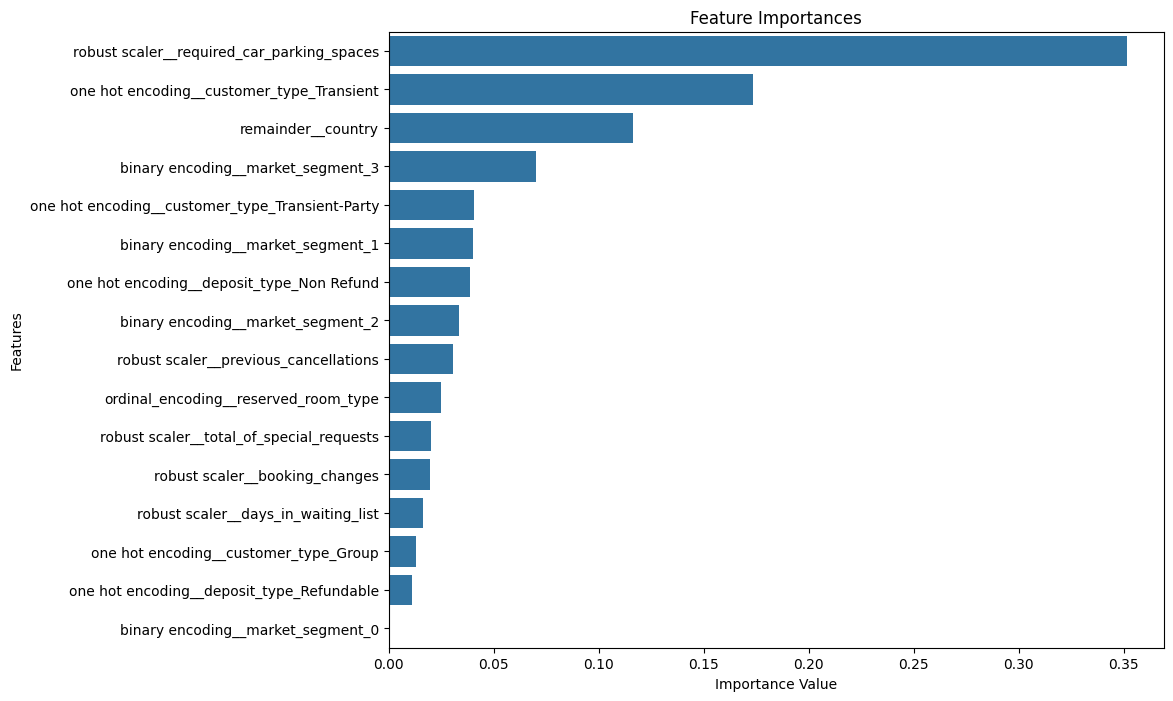

In [75]:
# Plot feature importances

# Extract feature importances from the best model found by RandomizedSearchCV
feature_imp = pd.DataFrame(
    best_model['model'].feature_importances_, 
    index=best_model['preprocessing'].get_feature_names_out(),
    columns=['Value']
).sort_values(by='Value', ascending=False)

# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(data=feature_imp, x='Value', y=feature_imp.index)
plt.title('Feature Importances')
plt.xlabel('Importance Value')
plt.ylabel('Features')
plt.show()

In [76]:
best_model[0].get_feature_names_out()

array(['one hot encoding__deposit_type_Non Refund',
       'one hot encoding__deposit_type_Refundable',
       'one hot encoding__customer_type_Group',
       'one hot encoding__customer_type_Transient',
       'one hot encoding__customer_type_Transient-Party',
       'binary encoding__market_segment_0',
       'binary encoding__market_segment_1',
       'binary encoding__market_segment_2',
       'binary encoding__market_segment_3',
       'ordinal_encoding__reserved_room_type',
       'robust scaler__previous_cancellations',
       'robust scaler__booking_changes',
       'robust scaler__days_in_waiting_list',
       'robust scaler__required_car_parking_spaces',
       'robust scaler__total_of_special_requests', 'remainder__country'],
      dtype=object)

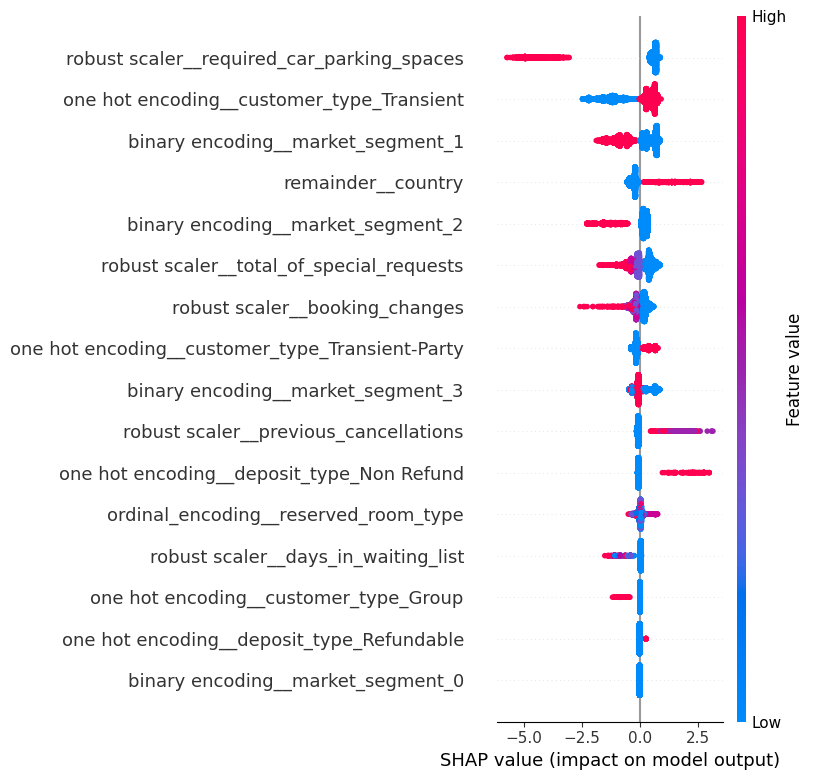

In [77]:
import shap

# define explainer
xgb_model = best_model['model']
data = pd.DataFrame(best_model[0].transform(X_train), columns=best_model[0].get_feature_names_out())

explainer = shap.TreeExplainer(
    xgb_model,
    data = data,
    # feature_dependence="independent",
    # model_output="probability"    
)


shap_values = explainer.shap_values(data)

# show as a plot                         
shap.summary_plot(shap_values, data, feature_names = data.columns)

**SHAP Value Analysis for Hotel Booking Model**

**Overview of SHAP Plot**

The plot visualizes the impact of various features on the model's output. Each row represents a feature, and the dots represent individual predictions. The x-axis shows the SHAP value (impact on model output), while color indicates the feature value (blue for low, red for high).

**Key Features Analysis**

**1. robust_scaler_required_car_parking_spaces**

- **Encoding**: Binary encoded feature for required car parking spaces
- **Impact**: Strong positive correlation with model output, especially for high values
- **Interpretation**: 
  - More parking spaces generally increase the prediction
  - Could indicate larger properties or those in car-dependent areas
  - Robust scaling suggests significant variability in parking requirements

**2. robust_scaler_previous_cancellations**

- **Encoding**: Binary encoded feature for previous booking cancellations
- **Impact**: Notable positive impact, particularly for higher values
- **Interpretation**:
  - More previous cancellations tend to increase the model's prediction
  - Might be predicting likelihood of future cancellations or pricing adjustments
  - Wide spread of high values indicates varying but strong positive impacts

**3. binary_encoding_market_segment_0**

- **Encoding**: Binary encoded feature for a specific market segment
- **Impact**: Minimal impact on model predictions
- **Interpretation**:
  - This particular market segment doesn't significantly influence the output
  - Binary nature reflected in two distinct clusters of dots

**General Observations**

1. **Feature Importance**: Parking spaces and cancellations have larger impacts than the market segment feature
2. **Data Preprocessing**:
   - Robust scaling used for continuous variables to handle outliers
   - Binary encoding used for categorical variables like market segments
3. **Model Focus**: Without knowing the specific prediction task, it appears the model heavily weighs operational factors (parking, cancellations) over market segmentation


## 6. **Conclusion and Recommendations**

### **6.1 Conclusion**
Based on the data analysis and modeling conducted, here are the main conclusions from this project:

- **Model Selection**: The best-performing model is XGBoost, which demonstrated superior performance compared to other models such as Decision Tree, KNN, Random Forest, AdaBoost, Gradient Boost, and Logistic Regression, after undergoing cross-validation.

- **Model Performance**: Through hyperparameter tuning, the XGBoost model achieved an F2 Score of 0.7553, indicating a significant improvement compared to the pre-tuning score of 0.35.

- **Business Calculation**: The loss analysis results indicate positive changes:
  - **Before Machine Learning**: The total loss reached $47,900 due to high False Negative (FN) rates.
  - **Before Tuning**: The total loss decreased to $36,300, with a more balanced combination of False Positive (FP) and FN.
  - **After Tuning with Optimal Threshold**: The total loss significantly dropped to $21,500, with the substantial reduction in FN being a key factor, despite a higher FP count.

- **Feature Importance**: Insights from the SHAP analysis highlight the following key features influencing model predictions:
  - **Required Car Parking Spaces**: This feature has a strong positive correlation with the model output, indicating that more parking spaces generally lead to higher cancellation predictions. It suggests a tendency towards larger properties or those located in car-dependent areas.
  - **Previous Cancellations**: The analysis shows a notable positive impact of previous cancellations on the model's predictions. Higher values for this feature increase the likelihood of future cancellations, indicating a predictive relationship that could influence pricing strategies.
  - **Market Segment**: In contrast, this feature shows minimal impact on model predictions. The SHAP analysis reveals that this particular segment does not significantly influence cancellation likelihood, indicating a potential area for further investigation or feature refinement.

### **6.2 Recommendations**
**Recommendations for the company:**

1. **Model Implementation**: Utilize this model to manage hotel bookings in order to minimize losses from cancellations.
2. **Mitigation of False Negative Risks:** Prioritize strategies to reduce False Negatives (FNs), as they significantly impact revenue. This could involve targeted marketing campaigns or special incentives for guests with a history of cancellations, encouraging them to confirm their reservations.

3. **Dynamic Pricing Strategy:** Utilize insights from feature importance to develop a dynamic pricing strategy that considers required car parking spaces and previous cancellations. For example, increasing prices for bookings with lower lead times or fewer parking spaces could help manage demand more effectively.

4. **Customer Segmentation:** Leverage the insights gained from the market segment feature to develop tailored marketing strategies. Identifying and targeting segments that are less likely to cancel can improve booking stability.

5. **Cancellation Policies**: Review and possibly revise cancellation policies based on the model's predictions. Offering flexible policies for certain segments may reduce cancellations without significantly impacting revenue.

**Recommendations for future model development:**

1. **Exploration of Hyperparameter Tuning**: Continue exploring hyperparameter tuning for the XGBoost model or consider ensemble approaches to enhance prediction accuracy. Using searching method like GridSearchCV might improve the model performance since it search all the hyperparameter.

2. **Improvement of FP Classification**: Focus on reducing the number of False Positives, as a high count can affect overall operational efficiency, even though FP losses are smaller.

3. **Review of Additional Data**: Conduct further analysis on the data and consider adding relevant features, including external factors (e.g., weather conditions or economic factors) to improve model predictability.
